Vamos primeiramente importar nossas bibliotecas

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

from math import *
import scipy.optimize as opt
from mpmath import cot, acot
import numpy as np
import pandas as pd

Vamos entao rodar nosso orimizador e gerar os resultados

In [99]:
_index = []
_radius = []
_input = []
_ackerman = []
_freudenstein = []
_error = []
_a = []
_b = []
_beta = []
_d = []
_big_error = []

i = 0

def damn_freud(l, w, R, beta, dims):

    a, b, c, d = dims

    theta_input = float(atan(l/(R-w/2)))
    theta_output_ackerman = float(acot(cot(theta_input) + w/l))

    def freudenstein_eq(theta_input):

        theta_input_freud = (pi/2)-beta-theta_input

        J1 = d/a
        J2 = d/c
        J3 = (a**2 - b**2 + c**2 + d**2) / (2*a*c)

        A = J3 - J1 + (1-J2)*cos(theta_input_freud)
        B = -2*sin(theta_input_freud)
        C = J1 + J3 - (1+J2)*cos(theta_input_freud)

        theta_output_freud = float(2*atan((-B-sqrt(B**2-4*A*C))/(2*A)))

        return (pi/2)+beta-theta_output_freud

    theta_output_freud = freudenstein_eq(theta_input)
    error = (theta_output_freud-theta_output_ackerman)

    return error, theta_input, theta_output_ackerman, theta_output_freud

def freud_opter(dims):

    global _index
    global _radius
    global _input
    global _ackerman
    global _freudenstein
    global _error
    global _a
    global _b
    global _beta
    global _d
    global _big_error

    global i
    i += 1

    a, beta, d = dims
    b = d-2*a*sin(beta)
    c = a

    l = 2.93
    w = 1.5

    _radius_inst = []
    _input_inst = []
    _ackerman_inst = []
    _freudenstein_inst = []
    _error_inst = []

    big_error = 0
    for radius in range(3, 201):
        error, theta_input, theta_output_ackerman, theta_output_freud = damn_freud(l, w, radius, beta, (a, b, c, d))

        _radius_inst.append(radius)
        _input_inst.append(theta_input)
        _ackerman_inst.append(theta_output_ackerman)
        _freudenstein_inst.append(theta_output_freud)
        _error_inst.append(error)

        big_error = big_error + (error)**2

    print('{} - For a={:.7f}, b={:.7f}, c={:.7f} and d={:.7f}, beta={:.7f}, error={:.5f}.'.format(i, a, b, c, d, beta, big_error))

    _radius.append(_radius_inst)
    _input.append(_input_inst)
    _ackerman.append(_ackerman_inst)
    _freudenstein.append(_freudenstein_inst)
    _error.append(_error_inst)

    _a.append(a)
    _b.append(b)
    _d.append(d)
    _beta.append(beta)

    _index.append(i)
    _big_error.append(big_error)

    return big_error

a = 0.20
beta = 0.43
d = 1.45

bnds = ((0.05, 0.3), (0.05, 0.5), (1.3, 1.5))

res = opt.minimize(freud_opter, (a, beta, d), bounds=bnds, method='SLSQP')

1 - For a=0.2000000, b=1.2832517, c=0.2000000 and d=1.4500000, beta=0.4300000, error=0.02547.
2 - For a=0.2000000, b=1.2832517, c=0.2000000 and d=1.4500000, beta=0.4300000, error=0.02547.
3 - For a=0.2000000, b=1.2832517, c=0.2000000 and d=1.4500000, beta=0.4300000, error=0.02547.
4 - For a=0.2000000, b=1.2832517, c=0.2000000 and d=1.4500000, beta=0.4300000, error=0.02547.
5 - For a=0.2000000, b=1.2832517, c=0.2000000 and d=1.4500000, beta=0.4300000, error=0.02547.
6 - For a=0.0907330, b=1.4464768, c=0.0907330 and d=1.4650713, beta=0.1026484, error=0.05686.
7 - For a=0.1567464, b=1.3631977, c=0.1567464 and d=1.4559660, beta=0.3004170, error=0.00290.
8 - For a=0.1567464, b=1.3631977, c=0.1567464 and d=1.4559660, beta=0.3004170, error=0.00290.
9 - For a=0.1567464, b=1.3631977, c=0.1567464 and d=1.4559660, beta=0.3004170, error=0.00290.
10 - For a=0.1567464, b=1.3631977, c=0.1567464 and d=1.4559660, beta=0.3004170, error=0.00290.
11 - For a=0.1567464, b=1.3631977, c=0.1567464 and d=1.4559

Vamos checar algumas listas de variaveis para confirmar que esta tudo certo:

In [102]:
_a

[0.2,
 0.2,
 0.2000000149011612,
 0.2,
 0.2,
 0.09073302317410709,
 0.1567463934074376,
 0.1567463934074376,
 0.1567464083085988,
 0.1567463934074376,
 0.1567463934074376,
 0.1538079013693117,
 0.1538079013693117,
 0.15380791627047288,
 0.1538079013693117,
 0.1538079013693117,
 0.14232067495336168,
 0.14232067495336168,
 0.14232068985452287,
 0.14232067495336168,
 0.14232067495336168,
 0.10554598954492389,
 0.10554598954492389,
 0.10554600444608508,
 0.10554598954492389,
 0.10554598954492389,
 0.05,
 0.05,
 0.0500000149011612,
 0.05,
 0.05,
 0.05,
 0.05,
 0.0500000149011612,
 0.05,
 0.05,
 0.050000000000000176,
 0.050000000000000176,
 0.05000001490116137,
 0.050000000000000176,
 0.050000000000000176]

Vamos plotar a curva de delta_i por R para ver como o esterçamento interno se comporta com a variaçao do raio de curvatura:

Text(0,0.5,'Angulo de esterçamento interno delta_i [deg]')

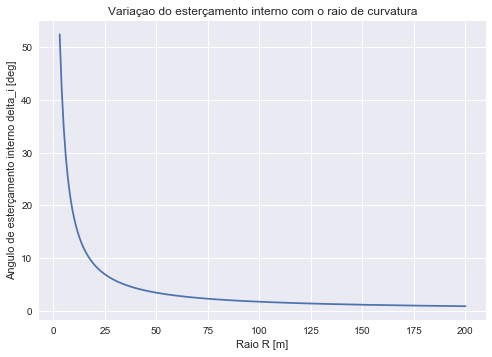

In [69]:
# Criemos uma nova lista com os valores de input em graus:
_input_deg = [x * 57.29 for x in _input[0]]

plt.plot(_radius[0],  _input_deg)
plt.title('Variaçao do esterçamento interno com o raio de curvatura')
plt.xlabel('Raio R [m]')
plt.ylabel('Angulo de esterçamento interno delta_i [deg]')

Vamos agora avaliar como se comporta o angulo de sterçamento externo de Ackerman:

Text(0,0.5,'Angulo de esterçamento externo de Ackerman delta_o,A [deg]')

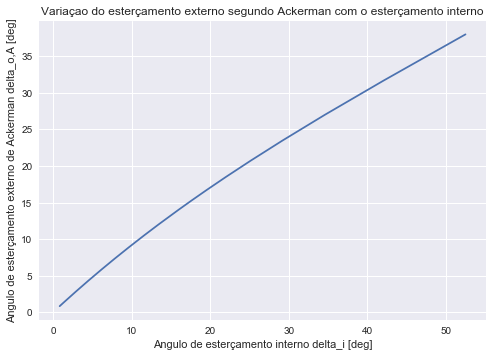

In [70]:
# Criemos uma nova lista com os valores de ackerman em graus:
_ackerman_deg = [x * 57.29 for x in _ackerman[0]]

plt.plot(_input_deg, _ackerman_deg)
plt.title('Variaçao do esterçamento externo segundo Ackerman com o esterçamento interno')
plt.xlabel('Angulo de esterçamento interno delta_i [deg]')
plt.ylabel('Angulo de esterçamento externo de Ackerman delta_o,A [deg]')

Vamos verificar a convergencia do desvio calculado ao longo das iteraçoes

Text(0,0.5,'Desvio do mecanismo trapezoidal para Ackerman')

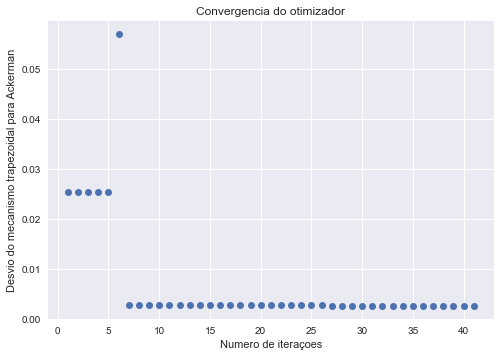

In [87]:
plt.plot(_index, _big_error, 'o')
plt.title('Convergencia do otimizador')
plt.xlabel('Numero de iteraçoes')
plt.ylabel('Desvio do mecanismo trapezoidal para Ackerman')

(0.0024, 0.003)

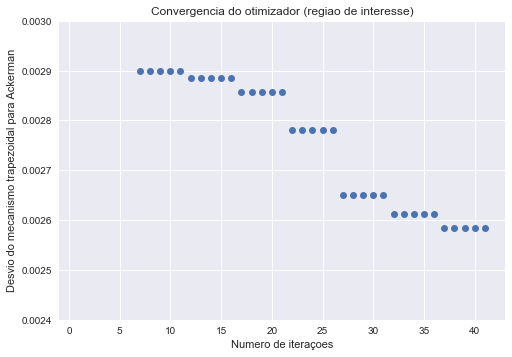

In [88]:
plt.plot(_index, _big_error, 'o')
plt.title('Convergencia do otimizador (regiao de interesse)')
plt.xlabel('Numero de iteraçoes')
plt.ylabel('Desvio do mecanismo trapezoidal para Ackerman')
plt.ylim([0.0024, 0.003])

Vamos verificar a evoluçao das dimensoes do mecanismo ao longo das iteraçoes

Text(0,0.5,'Dimensao das barras a/c [m]')

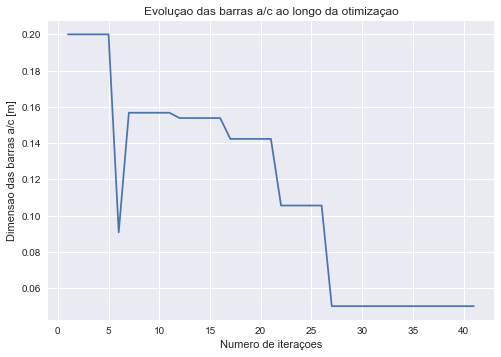

In [85]:
plt.plot(_index, _a)
plt.title('Evoluçao das barras a/c ao longo da otimizaçao')
plt.xlabel('Numero de iteraçoes')
plt.ylabel('Dimensao das barras a/c [m]')

Text(0,0.5,'Dimensao da barra d [m]')

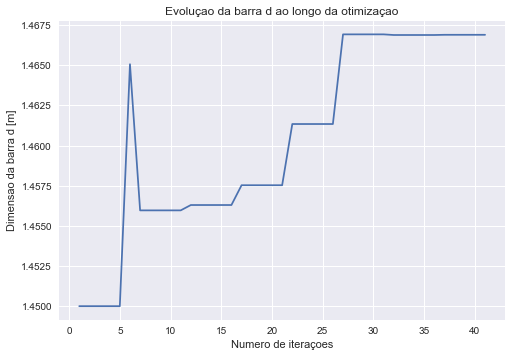

In [84]:
plt.plot(_index, _d)
plt.title('Evoluçao da barra d ao longo da otimizaçao')
plt.xlabel('Numero de iteraçoes')
plt.ylabel('Dimensao da barra d [m]')

Text(0,0.5,'Angulo beta [deg]')

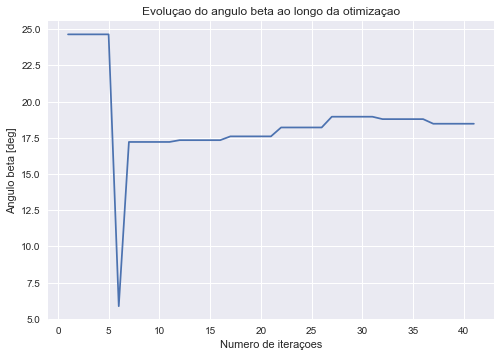

In [86]:
# Criemos uma nova lista com os valores de beta em graus:
_beta_deg = [x * 57.29 for x in _beta]

plt.plot(_index,  _beta_deg)
plt.title('Evoluçao do angulo beta ao longo da otimizaçao')
plt.xlabel('Numero de iteraçoes')
plt.ylabel('Angulo beta [deg]')

Vamos avaliar o mecanismo original contra o otimizado:

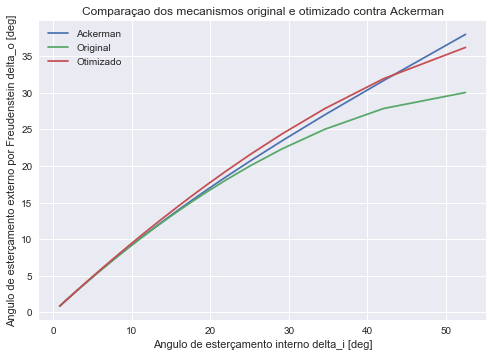

In [97]:
# Criemos uma nova lista com os valores de output em graus:
_freudenstein_orig_deg = [x * 57.29 for x in _freudenstein[0]]
_freudenstein_optm_deg = [x * 57.29 for x in _freudenstein[40]]

plt.plot(_input_deg, _ackerman_deg, label='Ackerman')
plt.plot(_input_deg, _freudenstein_orig_deg, label='Original')
plt.plot(_input_deg, _freudenstein_optm_deg, label='Otimizado')
plt.title('Comparaçao dos mecanismos original e otimizado contra Ackerman')
plt.xlabel('Angulo de esterçamento interno delta_i [deg]')
plt.ylabel('Angulo de esterçamento externo por Freudenstein delta_o [deg]')

plt.legend()